In [1]:
import sys

# Change path to wherever you have repo locally
sys.path.append('/oak/stanford/groups/engreitz/Users/ymo/Tools/gene_network_evaluation/src')

from plotting import program_corr,program_euclidean, top_genes_overlap,sort_corr_matrix,\
                        programs_dotplots, consensus_clustermap, cNMF_boxplot, \
                        stability_vs_sharedgenes, cNMF_barplot, \
                        trait_clustermap, geneset_clustermap,perturbation_clustermap,\
                        GO_clustermap,build_overlap_matrix,compute_gene_list_GO,\
                        compute_gene_list_perturbation,load_combined_matrix,\
                        kmean_cluster, NMF_clustermap
                            

                                
from plotting import convert_with_mygene, convert_adata_with_mygene, read_npz

/home/users/ymo/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
output_dir_1 = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/torch-cNMF_evaluation/batch/v100"
output_dir_2 = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/sk-cNMF_evaluation/091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius"
run_name_1 = "092525_100k_cells_10iter_torch_halsvar_batch_e7_v100s"
run_name_2 = "091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius_all"

# Program loading Dot plots

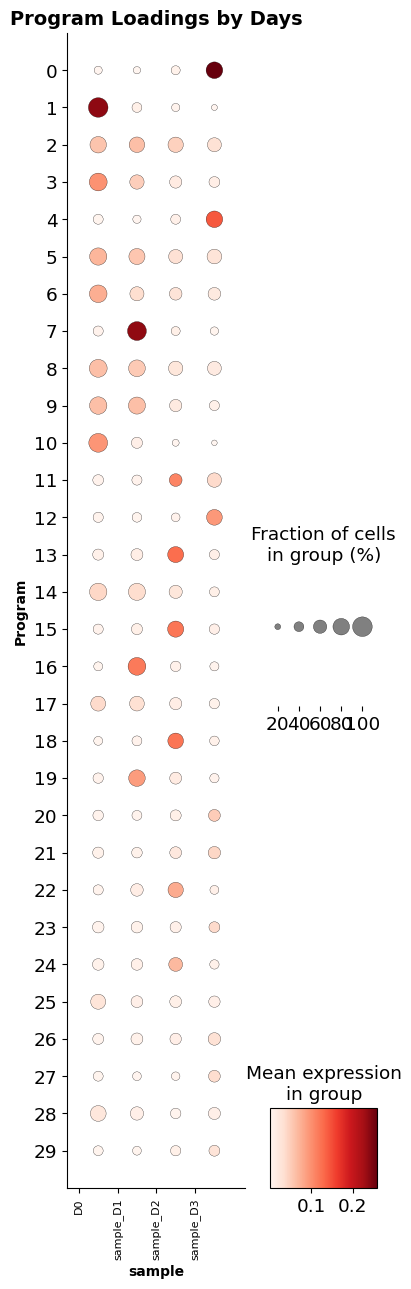

In [10]:
fig = programs_dotplots(30, output_dir_1, run_name_1, sel_thresh = 2.0, groupby='sample', figsize=(4, 15))

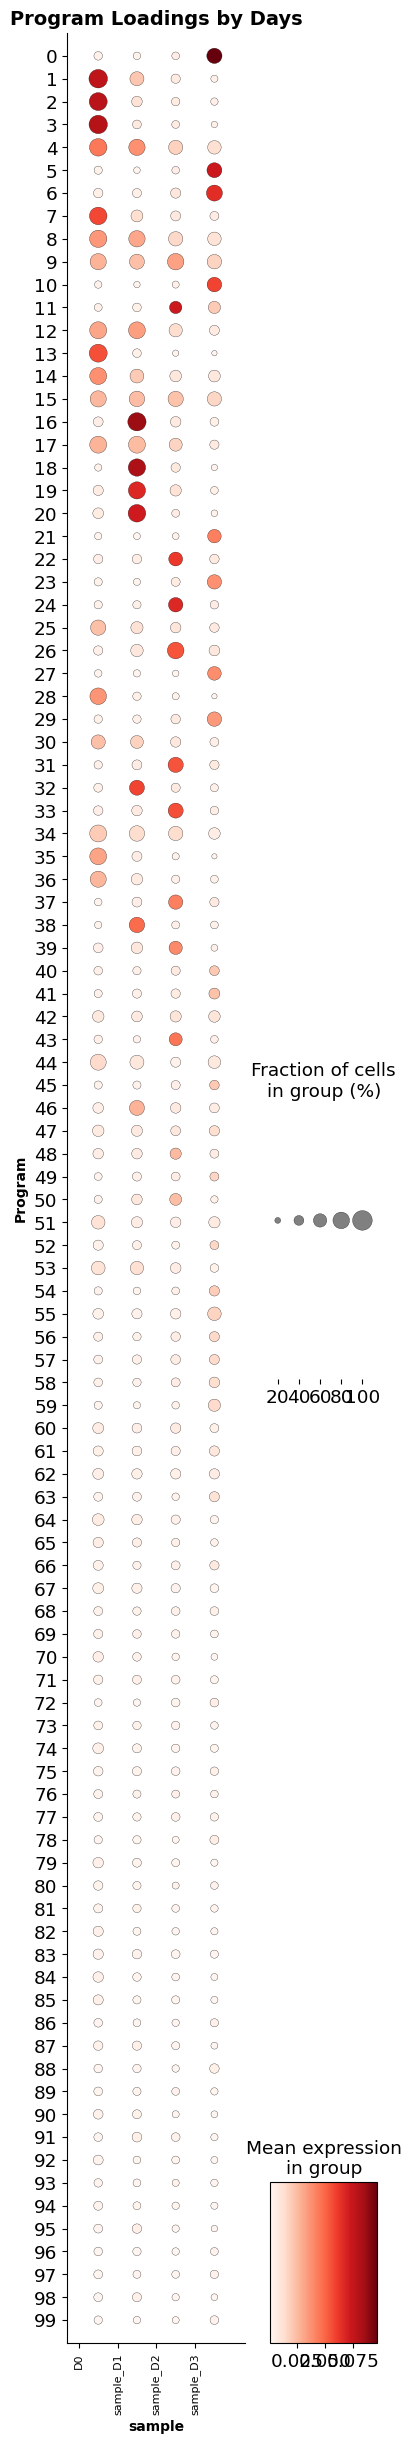

In [3]:
fig = programs_dotplots(100, output_dir_2, run_name_2, sel_thresh = 2.0, groupby='sample', figsize=(4, 30))

# Clustermap on cNMF programs

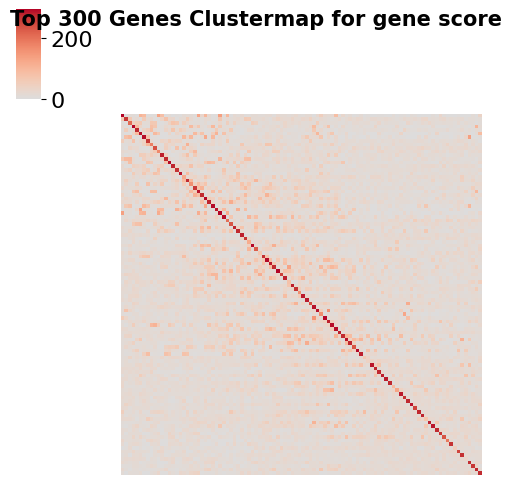

In [4]:
# gene score matrix
consensus_clustermap(100, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0,
 figsize = (5,5),  gene_num = 300, title = "Top 300 Genes Clustermap for gene score", gene_score = True)

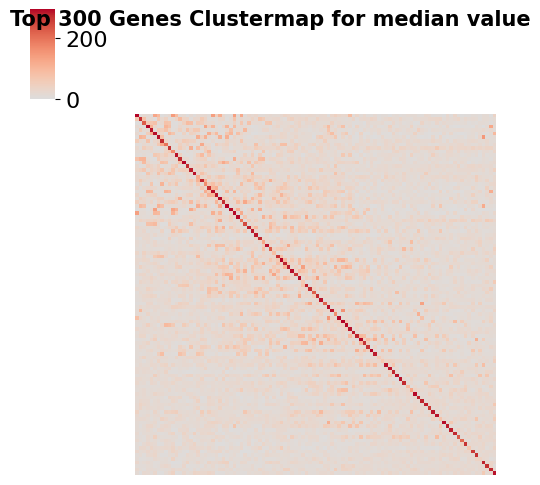

In [5]:
# median matrix 
consensus_clustermap(100, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0, 
figsize = (5,5),  gene_num = 300, title = "Top 300 Genes Clustermap for median value", gene_score=False)

# Boxplots on cNMF shared genes 

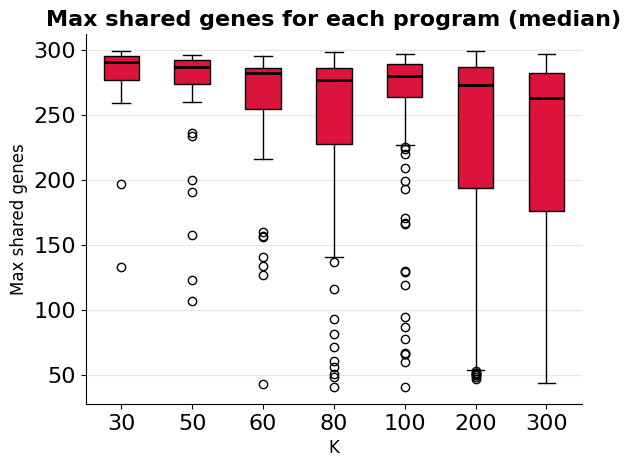

In [6]:
fig, shared_genes = cNMF_boxplot(output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0,\
gene_score=False, title = "Max shared genes for each program (median)")

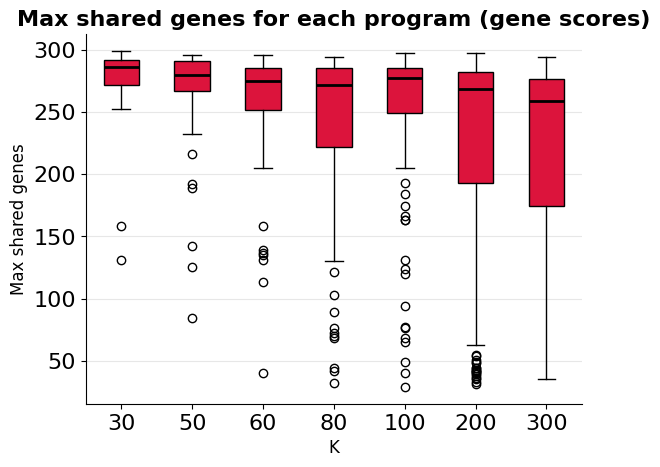

In [7]:
fig, shared_genes = cNMF_boxplot(output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0,\
gene_score=True, title = "Max shared genes for each program (gene scores)")

# cNMF programs barplot

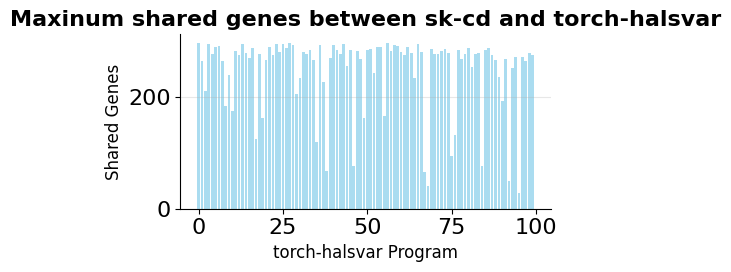

In [8]:
# gene score matrix
cNMF_barplot(100, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0,
 gene_num = 300, title="Maxinum shared genes between sk-cd and torch-halsvar",
  x_label="torch-halsvar Program", figsize = (5,3), gene_score=True)

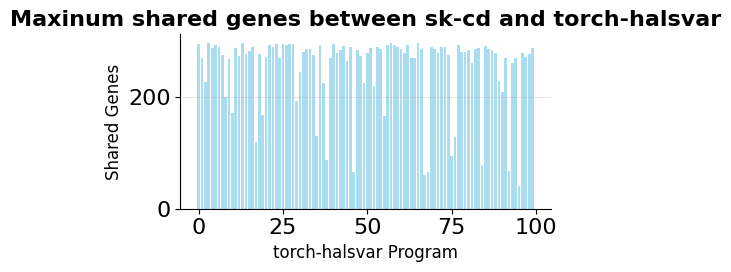

In [9]:
# median value matrix
cNMF_barplot(100, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0,
 gene_num = 300, title="Maxinum shared genes between sk-cd and torch-halsvar",
  x_label="torch-halsvar Program", figsize = (5,3), gene_score=False)

# Kmean quality

Combining factorizations for k=100.


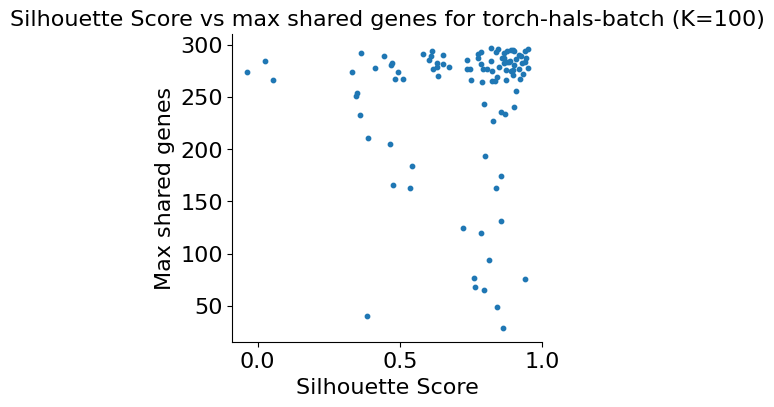

In [11]:
# gene scores
stability_vs_sharedgenes(100, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0,
gene_num = 300, local_neighborhood_size=0.30, density_threshold=2.0, 
title = "Silhouette Score vs max shared genes for torch-hals-batch (K=100)", gene_score = True, figsize = (4,4))

Combining factorizations for k=100.


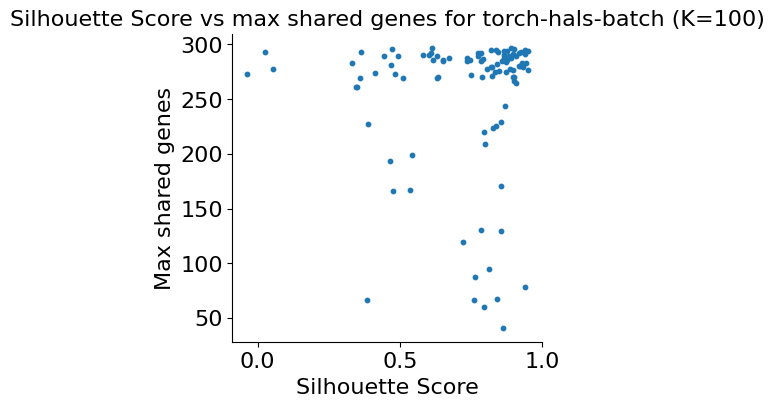

In [11]:
# median values
stability_vs_sharedgenes(100, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0,
 gene_num = 300, local_neighborhood_size=0.30, density_threshold=2.0, 
 title = "Silhouette Score vs max shared genes for torch-hals-batch (K=100)", gene_score = False, figsize = (4,4))

# Clustermap on NMF programs

Combining factorizations for k=30.
Combining factorizations for k=30.


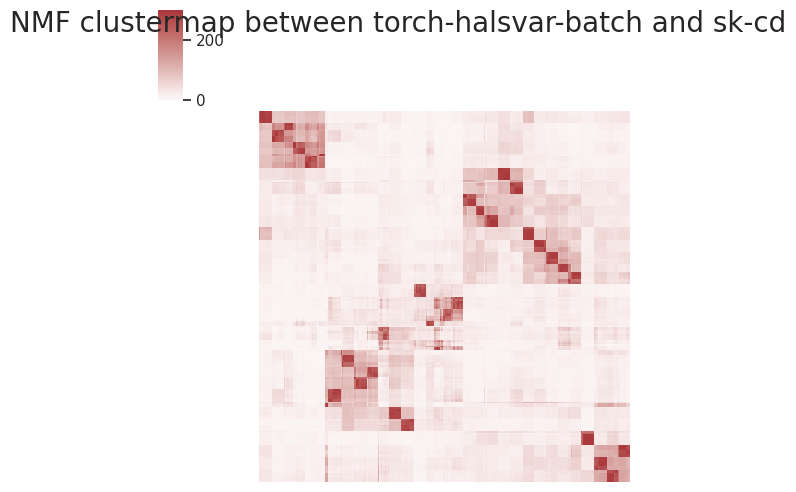

In [67]:
cluster = NMF_clustermap(30, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0, gene_num = 300,
 method = "overlap", title = "NMF clustermap between torch-halsvar-batch and sk-cd", figsize = (5,5), color = False)

Combining factorizations for k=30.
Combining factorizations for k=30.


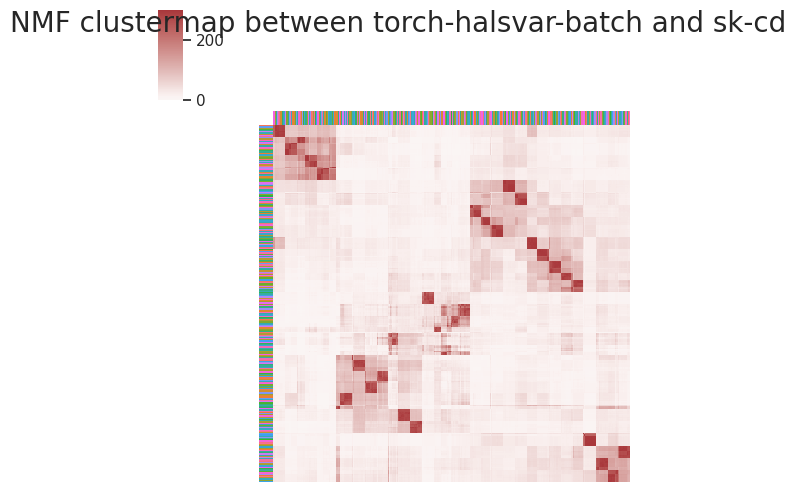

In [68]:
cluster = NMF_clustermap(30, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0, gene_num = 300,
 method = "overlap", title = "NMF clustermap between torch-halsvar-batch and sk-cd", figsize = (5,5), color = True)

Combining factorizations for k=30.
Combining factorizations for k=30.


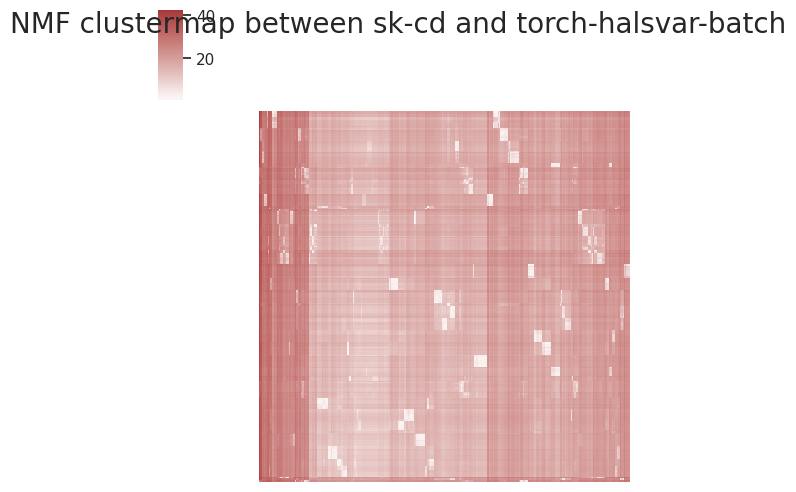

In [24]:
NMF_clustermap(30, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0, gene_num = 300,
 method = "distance", title = "NMF clustermap between sk-cd and torch-halsvar-batch", figsize = (5,5), color = False)

Combining factorizations for k=30.
Combining factorizations for k=30.


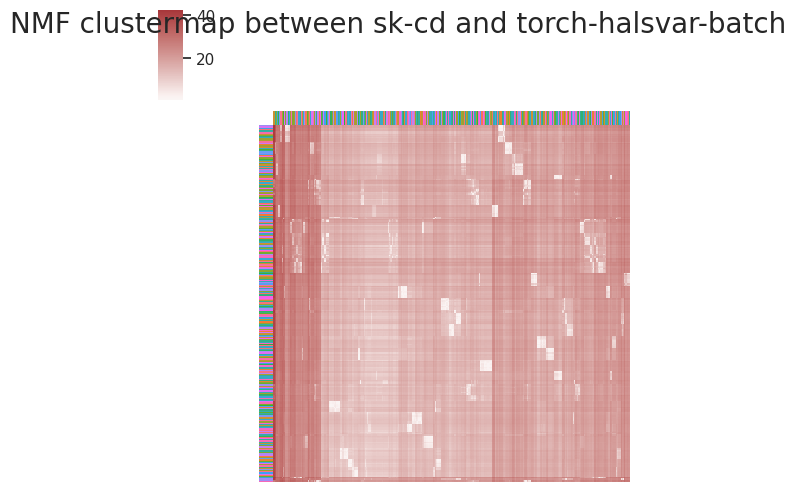

In [27]:
NMF_clustermap(30, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0, gene_num = 300,
 method = "distance", title = "NMF clustermap between sk-cd and torch-halsvar-batch", figsize = (5,5), color = True)

Combining factorizations for k=30.
Combining factorizations for k=30.


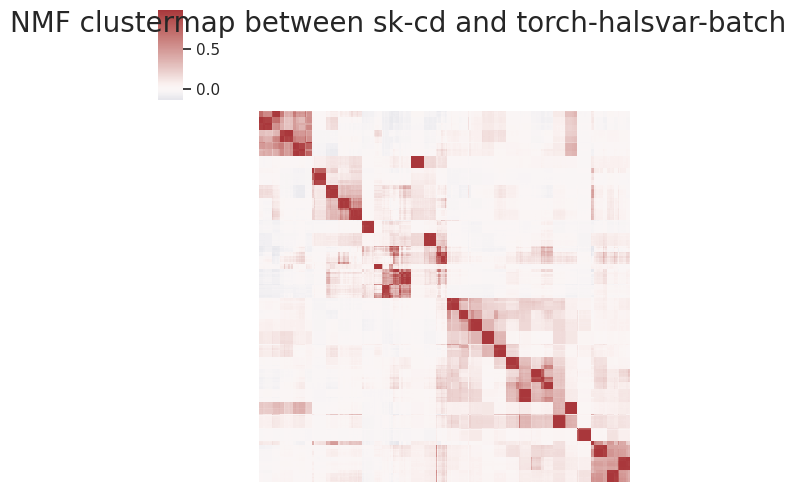

In [25]:
NMF_clustermap(30, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0, gene_num = 300,
 method = "corr", title = "NMF clustermap between sk-cd and torch-halsvar-batch", figsize = (5,5), color = False)

Combining factorizations for k=30.
Combining factorizations for k=30.


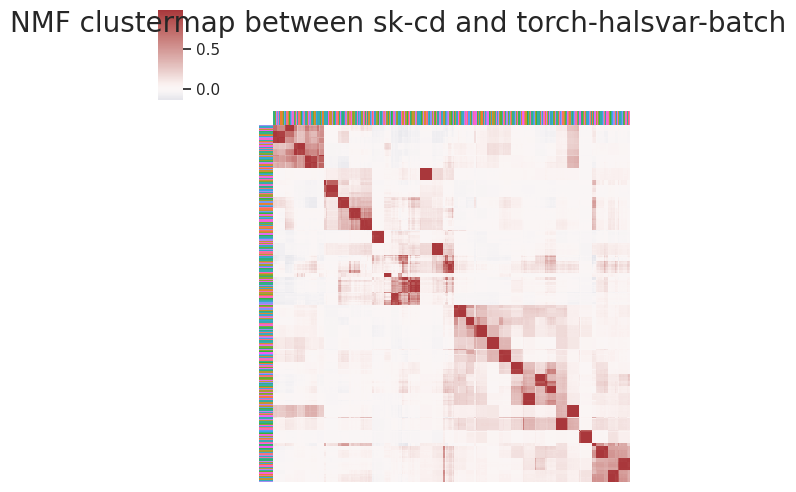

In [26]:
NMF_clustermap(30, output_dir_1, output_dir_2, run_name_1, run_name_2, sel_thresh_1=2.0, sel_thresh_2=2.0, gene_num = 300,
 method = "corr", title = "NMF clustermap between sk-cd and torch-halsvar-batch", figsize = (5,5), color = True)

# Label color for each cluster

Combining factorizations for k=30.
Combining factorizations for k=30.


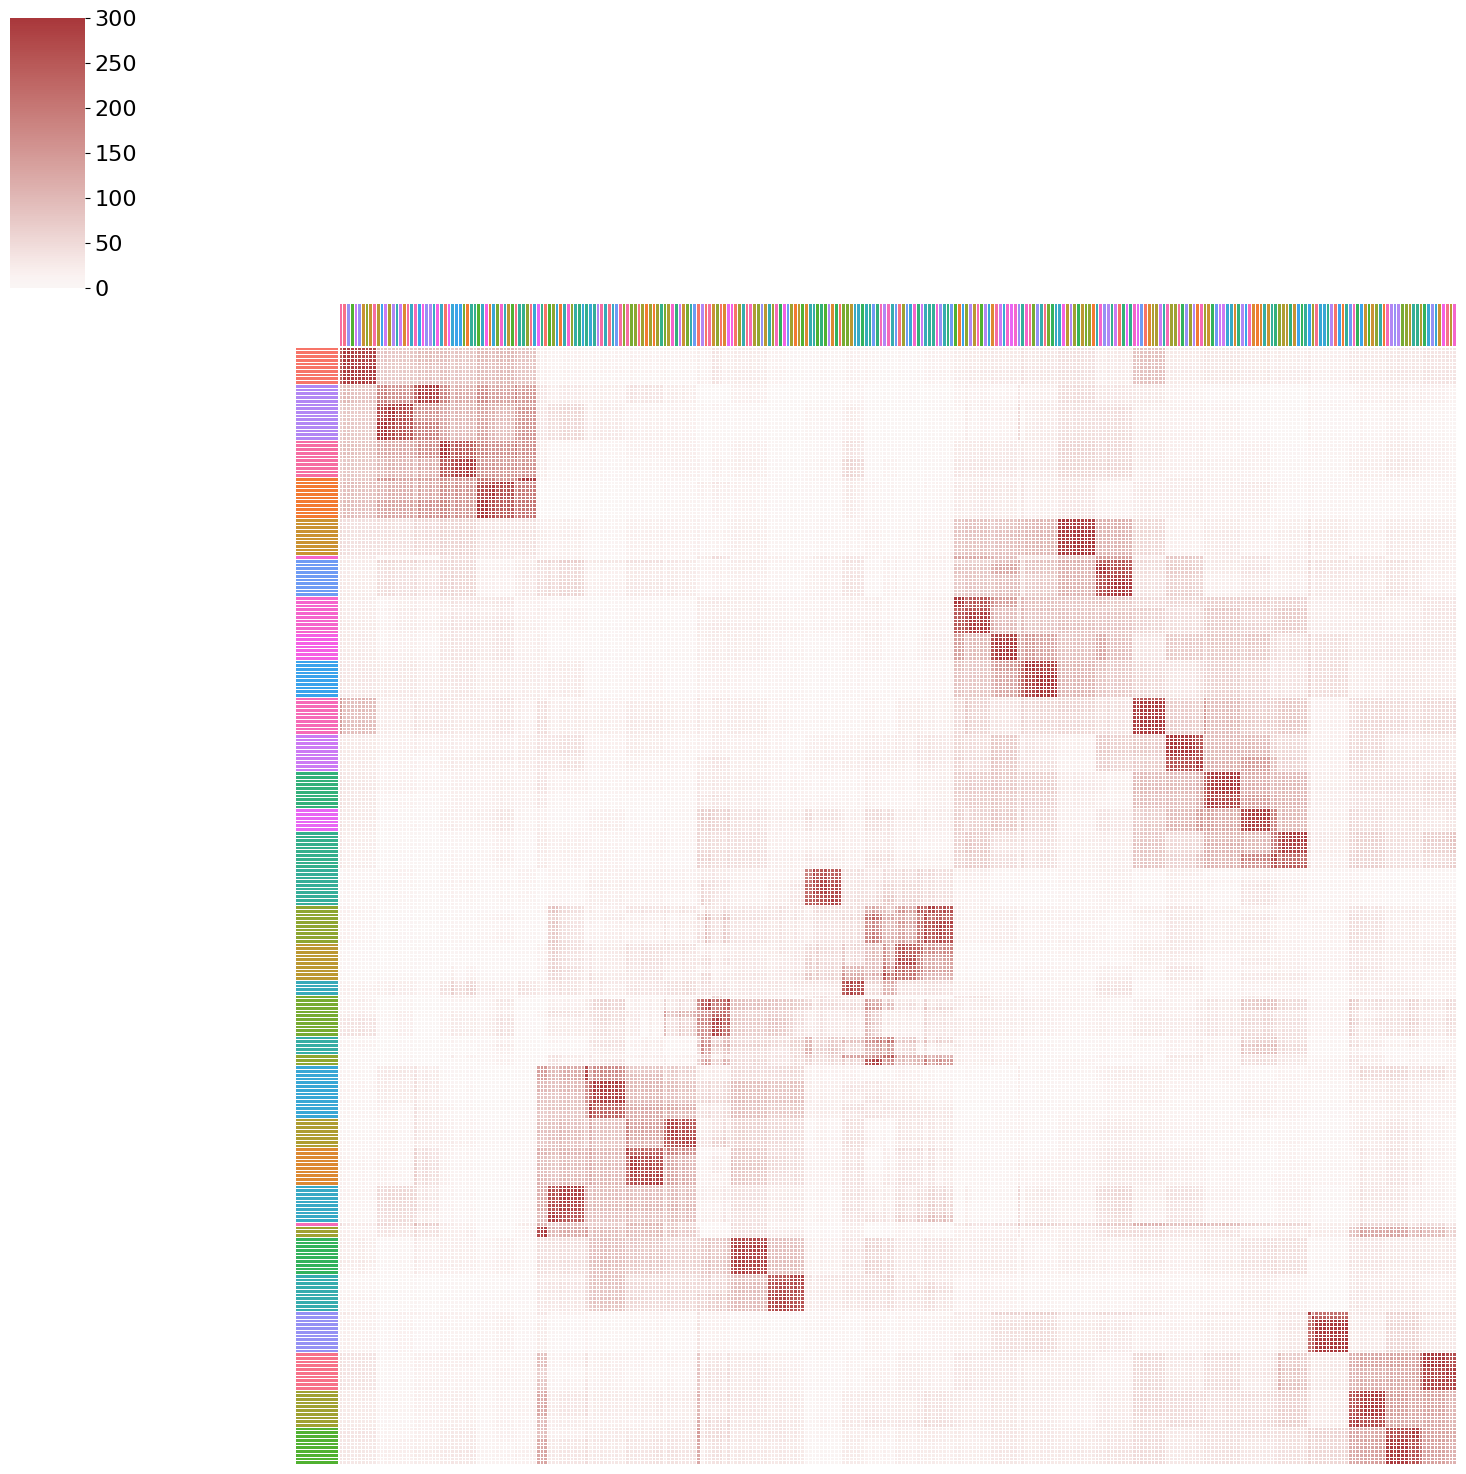

In [3]:
kmean_cluster(30, output_dir_1, output_dir_2, run_name_1, run_name_2, figsize = (15,15))

# Shared perturbation genes

max value: 0.9699248120300752


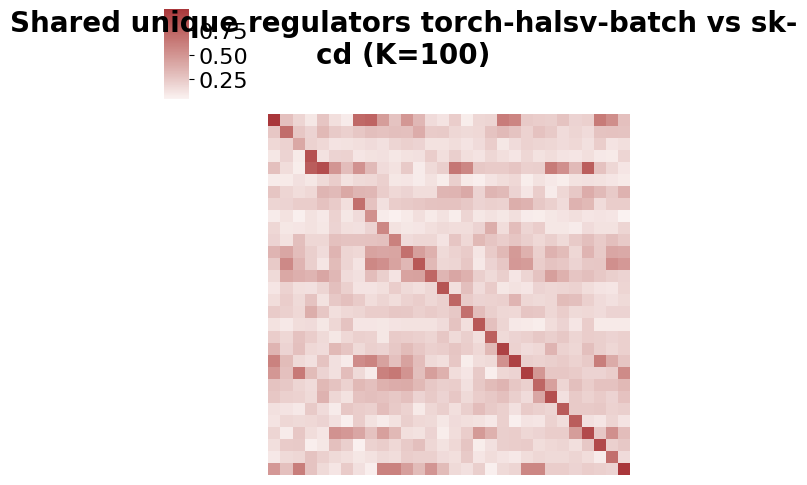

In [5]:
perturbation_clustermap(30, output_dir_1, output_dir_2, run_name_1, run_name_2,
figsize = (5,5), pval = 0.05, title = "Shared unique regulators torch-halsv-batch vs sk-cd (K=100)")

max value: 1.0


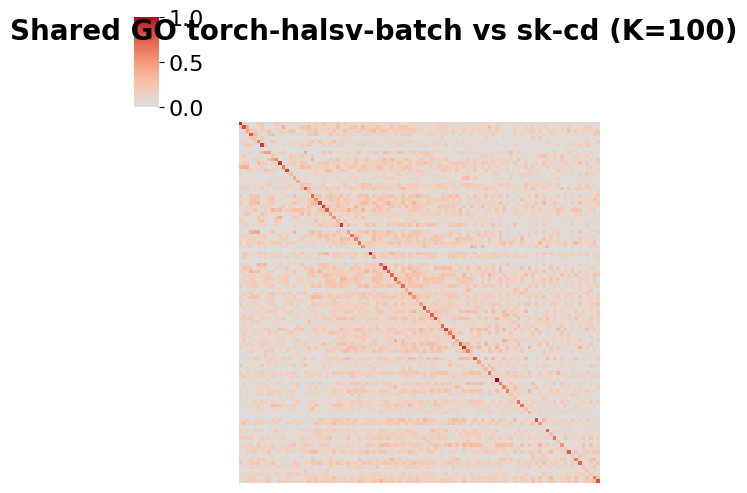

In [6]:
GO_clustermap(100,output_dir_1, output_dir_2, run_name_1, run_name_2,
figsize = (5,5), pval = 0.05, title = "Shared GO torch-halsv-batch vs sk-cd (K=100)")

max value: 0.9743589743589743


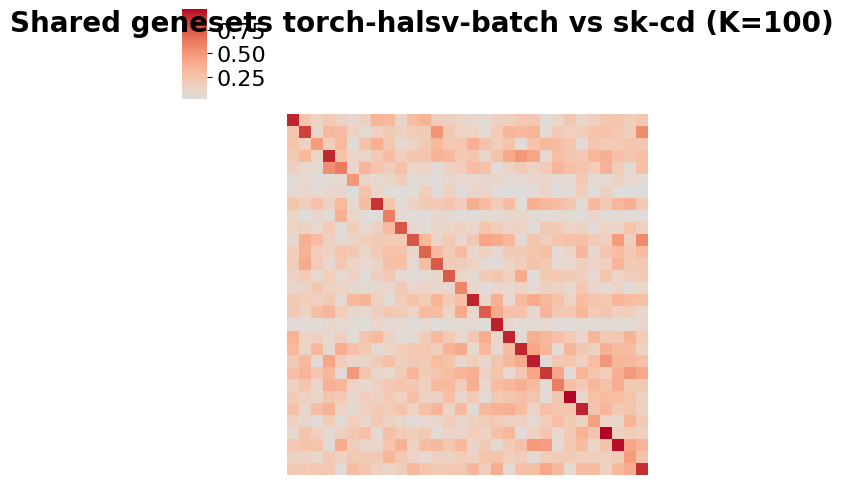

In [7]:
geneset_clustermap(30, output_dir_1, output_dir_2, run_name_1, run_name_2,
figsize = (5,5), pval = 0.05, title = "Shared genesets torch-halsv-batch vs sk-cd (K=100)")

max value: 1.0


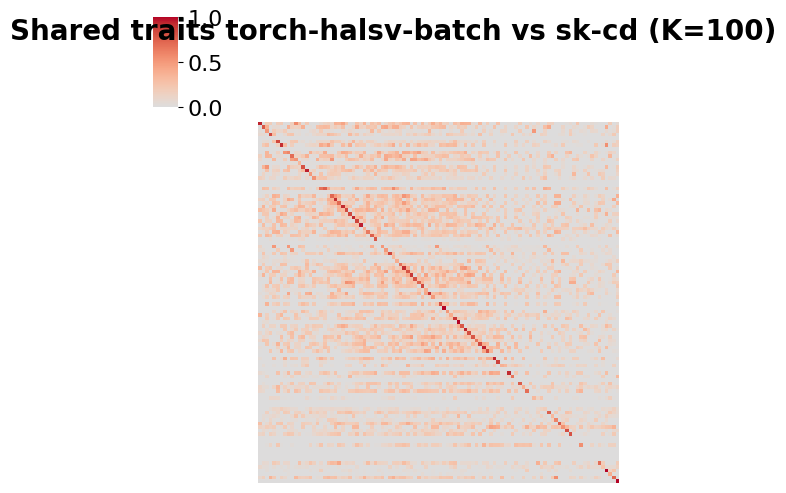

In [8]:
trait_clustermap(100, output_dir_1, output_dir_2, run_name_1, run_name_2,
figsize = (5,5), pval = 0.05, title = "Shared traits torch-halsv-batch vs sk-cd (K=100)")